# Generate Xray classification model


**The goal is to detect whether an input image is lung xray image or not**


Import necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

In [16]:
import requests
import os
import shutil

testset_rate = 0.1
parent_dir = "/content/drive/My Drive/xray image detection"

class_folder_name = "class1"
class1_path = os.path.join(parent_dir, class_folder_name)
files = os.listdir(class1_path)
img_count = len(files)
tetset_count = round(img_count * 0.1)
trainset_count = img_count - tetset_count

dataset_path = os.path.join(parent_dir, "dataset")
if (not os.path.exists(dataset_path)):
    os.mkdir(dataset_path)

if (not os.path.exists(os.path.join(dataset_path, "test"))):
    os.mkdir(os.path.join(dataset_path, "test"))

if (not os.path.exists(os.path.join(dataset_path, "test", "class0"))):
    os.mkdir(os.path.join(dataset_path, "test", "class0"))

if (not os.path.exists(os.path.join(dataset_path, "test", "class1"))):
    os.mkdir(os.path.join(dataset_path, "test", "class1"))

if (not os.path.exists(os.path.join(dataset_path, "train"))):
    os.mkdir(os.path.join(dataset_path, "train"))

if (not os.path.exists(os.path.join(dataset_path, "train", "class0"))):
    os.mkdir(os.path.join(dataset_path, "train", "class0"))

if (not os.path.exists(os.path.join(dataset_path, "train", "class1"))):
    os.mkdir(os.path.join(dataset_path, "train", "class1"))


for i in range(img_count):
    if (i < tetset_count):
        path = os.path.join(dataset_path, "test")
    else:
        path = os.path.join(dataset_path, "train")
    # first, move main class images to class1
    shutil.copy(os.path.join(parent_dir, class_folder_name, files[i]), os.path.join(path, "class1"))
    
    # then, move random class images to class0
    url = "https://picsum.photos/200/200/?random"
    response = requests.get(url)
    if response.status_code == 200:
        file_name = 'random_{}.jpg'.format(i)
        file_path = os.path.join(path, "class0",file_name)
        with open(file_path, 'wb') as f:
            print("saving: " + file_name)
            f.write(response.content)

saving: random_0.jpg
saving: random_1.jpg
saving: random_2.jpg
saving: random_3.jpg
saving: random_4.jpg
saving: random_5.jpg
saving: random_6.jpg
saving: random_7.jpg
saving: random_8.jpg
saving: random_9.jpg
saving: random_10.jpg
saving: random_11.jpg
saving: random_12.jpg
saving: random_13.jpg
saving: random_14.jpg
saving: random_15.jpg
saving: random_16.jpg
saving: random_17.jpg
saving: random_18.jpg
saving: random_19.jpg
saving: random_20.jpg
saving: random_21.jpg
saving: random_22.jpg
saving: random_23.jpg
saving: random_24.jpg
saving: random_25.jpg
saving: random_26.jpg
saving: random_27.jpg
saving: random_28.jpg
saving: random_29.jpg
saving: random_30.jpg
saving: random_31.jpg
saving: random_32.jpg
saving: random_33.jpg
saving: random_34.jpg
saving: random_35.jpg
saving: random_36.jpg
saving: random_37.jpg
saving: random_38.jpg
saving: random_39.jpg
saving: random_40.jpg
saving: random_41.jpg
saving: random_42.jpg
saving: random_43.jpg
saving: random_44.jpg
saving: random_45.jp

Get training set
Generate data and set data into test/train samples using flow_from_directory function. 
"categorical" class mode is set which will return 2D one-hot encoded labels

In [32]:
from keras.preprocessing.image import ImageDataGenerator
input_size = (200, 200)
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(os.path.join(dataset_path, "train"),
                                                 target_size = input_size,
                                                 batch_size = batch_size ,
                                                 shuffle = True, 
                                                 class_mode = "binary")

test_set = test_datagen.flow_from_directory(os.path.join(dataset_path, "test"),
                                            target_size = input_size,
                                            batch_size = batch_size ,
                                            shuffle = True,
                                            class_mode = "binary")
print(training_set.class_indices)

Found 1524 images belonging to 2 classes.
Found 170 images belonging to 2 classes.
{'class0': 0, 'class1': 1}


# Model
* cnn is used to make image classification

* classifier will be a sequential model.
* Add a 3x3 convolutional layer with 32 filters with relu activation function.
* We use 200x200 inputs with RGB colors which makes input shape 200x200x3.
* Add max pooling with 3x3 filter after convolution.
* Add 2 hidden layers to model.
* Flatten matrix to 1D.
* Set dropout rate as 0.6 to prevent overfitting.
* Add final layer which uses softmax for outputs  
* Finally, Compile the model with adam optimizer, use categorical_crossentropy as loss function (considering one hot encoded labels)


In [33]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fit the model with training set

In [34]:
steps_per_epoch = trainset_count//batch_size
print(steps_per_epoch)
history = model.fit(training_set,
                         steps_per_epoch = steps_per_epoch,
                         epochs = 20)

23
Epoch 1/20
23/23 [==============================] - 12s 495ms/step - loss: 0.6553 - accuracy: 0.6566
Epoch 2/20
23/23 [==============================] - 11s 495ms/step - loss: 0.4876 - accuracy: 0.8005
Epoch 3/20
23/23 [==============================] - 12s 490ms/step - loss: 0.3385 - accuracy: 0.8525
Epoch 4/20
23/23 [==============================] - 11s 475ms/step - loss: 0.2936 - accuracy: 0.8746
Epoch 5/20
23/23 [==============================] - 11s 471ms/step - loss: 0.2449 - accuracy: 0.9093
Epoch 6/20
23/23 [==============================] - 11s 468ms/step - loss: 0.2515 - accuracy: 0.8970
Epoch 7/20
23/23 [==============================] - 11s 485ms/step - loss: 0.2354 - accuracy: 0.9044
Epoch 8/20
23/23 [==============================] - 12s 502ms/step - loss: 0.2062 - accuracy: 0.9265
Epoch 9/20
23/23 [==============================] - 11s 494ms/step - loss: 0.1931 - accuracy: 0.9207
Epoch 10/20
23/23 [==============================] - 11s 497ms/step - loss: 0.1766 - acc

In [35]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
# print("Generate predictions for 3 samples")
# predictions = model.predict(x_test[:3])
# print("predictions shape:", predictions.shape)

Evaluate on test data
6/6 [==============================] - 3s 577ms/step - loss: 0.1694 - accuracy: 0.9412
test loss, test acc: [0.1694362312555313, 0.9411764740943909]


Plot results of model

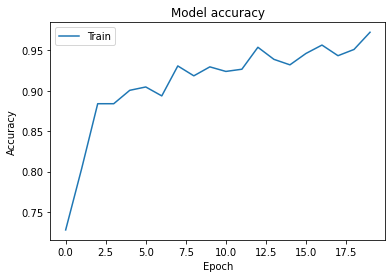

In [36]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
# plt.plot(results.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [37]:
# !mkdir -p saved_model
model.save('saved_model/xray_model', include_optimizer=False) 


INFO:tensorflow:Assets written to: saved_model/xray_model/assets


This is not lung x-ray:


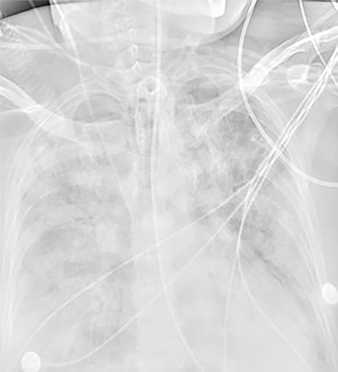





This is not lung x-ray:


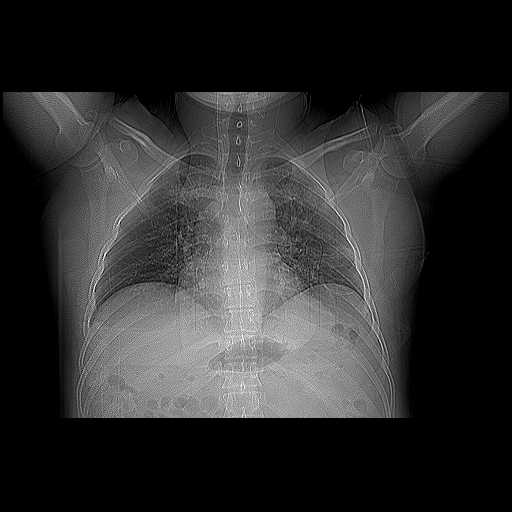





This is not lung x-ray:


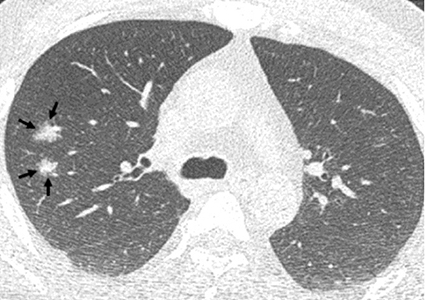





Count:  85
Count True:  82


In [38]:
# import libraries
from keras.preprocessing import image
import numpy as np 
from IPython.display import Image
import os
from keras.models import load_model
import tensorflow as tf
import shutil 

# load the model
# MODEL_PATH = '/content/drive/My Drive/xray image detection/saved_model/xray_model'
MODEL_PATH = 'saved_model/xray_model'
is_xray_model = tf.keras.models.load_model(MODEL_PATH)

count = 0
count_true=0
predict_path = os.path.join(dataset_path, "test", "class1")

for file in os.listdir(predict_path):
    if not file.startswith('.'): # to avoid .ds_store files on my mac
        file = predict_path + "/" + file
        
        test_image = image.load_img(file, target_size = (200, 200))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        
        result = is_xray_model.predict(test_image)
        # training_set.class_indices
        if result[0][0] == 1:
            prediction = 'This is lung x-ray:'
            count_true = count_true + 1
        else:
            prediction = 'This is not lung x-ray:'
            # shutil.copy(file, '/content/drive/My Drive/xray image detection/false negative results')
            print(prediction)
            img = Image(file, width = "400", height = "400")
            display(img)
            print("\n")
            print("\n")
        count= count+1

print("Count: ", count)
print("Count True: ", count_true)
# !mkdir -p saved_model
# classifier.save('saved_model/my_model', include_optimizer=False) 
